In [170]:
import time
Z_times = []
Sunday_times = []

print(Sunday_times)
print(Z_times)


[]
[]


In [171]:
loop = 1

for i in range(loop):
    Sunday_set_time = time.time()

    def check(char, pat,lenpat,textindex):
        j = lenpat - 1
        a = -1
        while j >= 0:
            if pat[j] == char:
                a = textindex - j
                break
            j -=1
        return a
     
    def sundayAlg(text,pat):
        t ,p= len(text),len(pat)
        i = 0
        j = p - 1
        while i < t-p :
            b = 0
            z = p - 1
            while b < p: 
                if pat[z] != text[i+z]:
                    a = check(text[i+j+1],pat,p,i+j+1)
                    if a < 0:
                        i = i + j + 2 
                    else: 
                        i = a
                    break     
                z-=1
                b+=1               
            else:
                break
        return i                  

    print(sundayAlg('abcadabadccdbabd', 'cadab')) 

    time.sleep(3)

    Sunday_after_op_time = time.time()

    Sunday_elapsed_time = Sunday_after_op_time -Sunday_set_time - 3
    Sunday_times.append(Sunday_elapsed_time)



2


In [172]:
loop = 1


def getZarr(string, z):
	n = len(string)
	l, r, k = 0, 0, 0
	for i in range(1, n):	
		if i > r:
			l, r = i, i	
			while r < n and string[r - l] == string[r]:
				r += 1
			z[i] = r - l
			r -= 1
		else:	
			k = i - l	
			if z[k] < r - i + 1:
				z[i] = z[k]	
			else:	
				l = i
				while r < n and string[r - l] == string[r]:
					r += 1
				z[i] = r - l
				r -= 1


def searchZarr(text, pattern):
	concat = pattern + "$" + text
	l = len(concat)
	z = [0] * l
	getZarr(concat, z)
	for i in range(l):
		if z[i] == len(pattern):
			print("Pattern found at index",
					i - len(pattern) - 1)



txt = 'abcadabadccdbabd'
pat =  'cadab'


for i in range(loop):
	
    Z_set_time = time.time()
    searchZarr(txt,pat)
    time.sleep(3)
    Z_after_op_time = time.time()
    Z_elapsed_time = Z_after_op_time - Z_set_time - 3
    Z_times.append(Z_elapsed_time)     


Pattern found at index 2


[0.0001380443572998047]
[0.0010106563568115234]
0.0001380443572998047 0.0010106563568115234


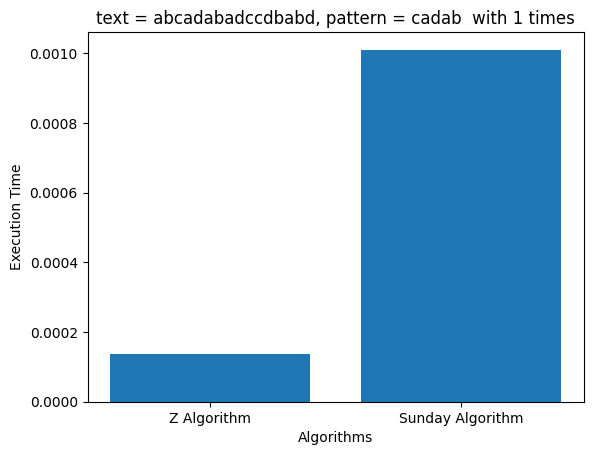

In [173]:
print(Z_times)
print(Sunday_times)
Z_average = 0
for i in range(len(Z_times)):
    Z_average += Z_times[i]
Z_average /= 1  

Sunday_average = 0
for i in range(len(Sunday_times)):
    Sunday_average += Sunday_times[i]
Sunday_average /= 1

import matplotlib.pyplot as plt

Algnames = ["Z Algorithm","Sunday Algorithm"]
Algtimes = [Z_average,Sunday_average]
print(Z_average,Sunday_average)

plt.bar(Algnames,Algtimes)

plt.xlabel("Algorithms")
plt.ylabel("Execution Time")

plt.title("text = abcadabadccdbabd, pattern = cadab  with 1 times")

plt.show()

1. In the 100 Times Sunday is a little bit faster than Z
2. In the 10 Times Z is a little bit faster than Sunday
3. In the 1 Times Z a little bit faster than Sunday

But sometimes Sunday can be faster 3x or 2x than Z but it can be reverse to

KMP VS RABIN-KARP

In [174]:
Kmp_times = []
Rabin_times = []

In [175]:
loop = 1

for i in range(loop):

    Rabin_set_time = time.time()

    d = 10

    def search(pattern, text, q):
        m = len(pattern)
        n = len(text)
        p = 0
        t = 0
        h = 1
        i = 0
        j = 0

        for i in range(m-1):
            h = (h*d) % q

        # Calculate hash value for pattern and text
        for i in range(m):
            p = (d*p + ord(pattern[i])) % q
            t = (d*t + ord(text[i])) % q

        # Find the match
        for i in range(n-m+1):
            if p == t:
                for j in range(m):
                    if text[i+j] != pattern[j]:
                        break

                j += 1
                if j == m:
                    print("Pattern is found at position: " + str(i+1))

            if i < n-m:
                t = (d*(t-ord(text[i])*h) + ord(text[i+m])) % q

                if t < 0:
                    t = t+q


    txt = 'abcadabadccdbabd'
    pat =  'cadab'
    q = 13
    search(pat, txt, q)

    time.sleep(3)

    Rabin_after_op_time = time.time()

    Rabin_elapsed_time = Rabin_after_op_time - Rabin_set_time - 3
    Rabin_times.append(Rabin_elapsed_time) 

Pattern is found at position: 3


In [176]:
loop = 1

for i in range(loop):
    Kmp_set_time = time.time()

    def KMPSearch(pat,text):
        n = len(pat)
        m = len(text)
    
        lps = [0]*n
        j = 0

        lpscalculate(pat,n,lps)

        i = 0
        while (m - i) >= (n - j):
            if pat[j] == txt[i]:
                i += 1
                j += 1
            if j == n:
                print("Found pattern at index " + str(i-j))
                j = lps[j-1]
 
  
            elif i < m and pat[j] != txt[i]:
           
                if j != 0:
                    j = lps[j-1]
                else:
                    i += 1   
        return True


    def lpscalculate(pat,n,lps):
        len = 0  
 
        lps[0] = 0
        i = 1

        while i < n:
            if pat[i] == pat[len]:
                len += 1
                lps[i] = len
                i += 1
            else:
 
                if len != 0:
                    len = lps[len-1]
 
                else:
                    lps[i] = 0
                    i += 1
         
        return True

 
    txt = 'abcadabadccdbabd'
    pat =  'cadab'
    KMPSearch(pat, txt)

    time.sleep(3)

    Kmp_after_op_time = time.time()

    Kmp_elapsed_time = Kmp_after_op_time - Kmp_set_time - 3
    Kmp_times.append(Kmp_elapsed_time)


Found pattern at index 2


[0.013095855712890625]
[0.015210151672363281]
0.013095855712890625 0.015210151672363281


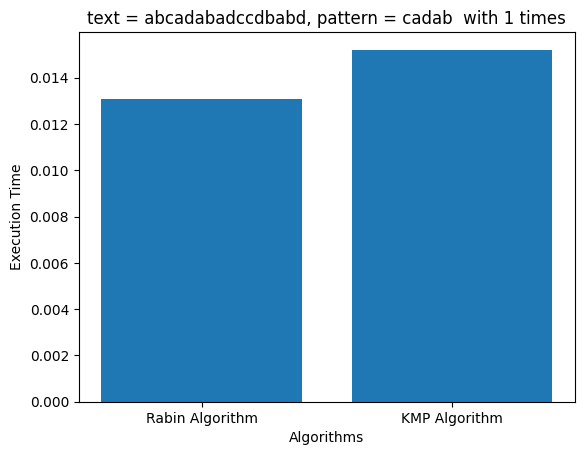

In [177]:
print(Rabin_times)
print(Kmp_times)
Rabin_average = 0
for i in range(len(Rabin_times)):
    Rabin_average += Rabin_times[i]
Rabin_average /= 1

Kmp_average = 0
for i in range(len(Kmp_times)):
    Kmp_average += Kmp_times[i]
Kmp_average /= 1

import matplotlib.pyplot as plt

Algnames = ["Rabin Algorithm","KMP Algorithm"]
Algtimes = [Rabin_average,Kmp_average]
print(Rabin_average,Kmp_average)

plt.bar(Algnames,Algtimes)

plt.xlabel("Algorithms")
plt.ylabel("Execution Time")

plt.title("text = abcadabadccdbabd, pattern = cadab  with 1 times")

plt.show()

1. In the 100 Times KMP is a little bit faster than Rabin
2. In the 10 Times Rabin is a little bit faster than KMP
3. In the 1 Times Rabin a little bit faster than KMP

sometimes KMP can be faster 7x,6x,3x or 2x than Rabin
sometimes Rabin can be faster than Rabin with 2x

Rabin VS Sunday Algorithm


0.013095855712890625 0.0010106563568115234


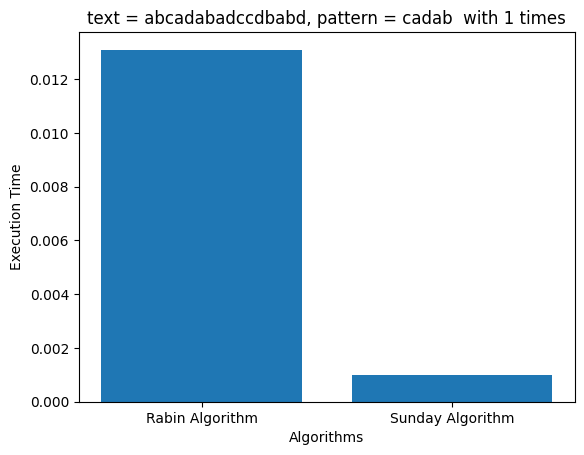

In [178]:

import matplotlib.pyplot as plt

Algnames = ["Rabin Algorithm","Sunday Algorithm"]
Algtimes = [Rabin_average,Sunday_average]
print(Rabin_average,Sunday_average)

plt.bar(Algnames,Algtimes)

plt.xlabel("Algorithms")
plt.ylabel("Execution Time")

plt.title("text = abcadabadccdbabd, pattern = cadab  with 1 times")

plt.show()

1. In the 100 Times Rabin is a little bit faster than Sunday
2. In the 10 Times Rabin is a little bit faster than Sunday
3. In the 1 Times Sunday a little bit faster than Rabin
But in this 3 situations it can be reverse to 

sometimes Rabin can be faster 2x or 3x than Sunday
sometimes Sunday can be faster than Rabin with 8x,3x,2x